# Run the whole deltas algorithm

In [83]:
%load_ext autoreload
%autoreload 2

from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample, non_sep
import deltas.plotting.plots as plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [84]:
N1 = 100
N2 = 10
# Gaussian (not always seperable)
data_clf = data.get_data(
    m1=[-2, -2],
    m2=[2, 2],
    cov1=[[1, 0], [0, 1]],
    cov2=[[1, 0], [0, 1]],
    N1=N1,
    N2=N2,
    scale=False,
    seed=1,
    )

## Get Classifier

Baseline


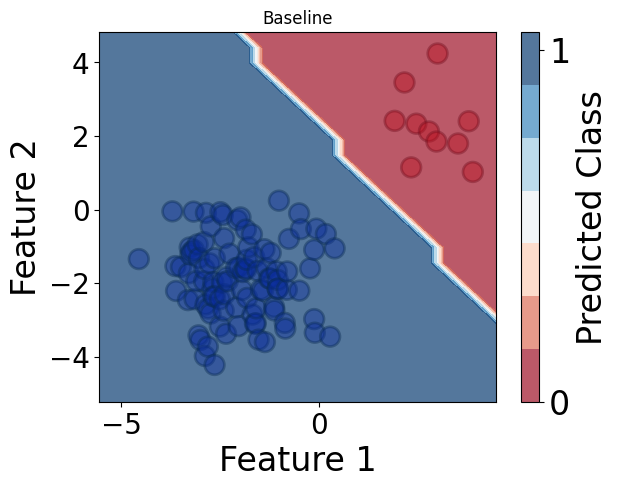

In [85]:
classifiers_dict = classifier.get_classifier(
    data_clf=data_clf,
    model='Linear',
    balance_clf=False,
    balanced_weights=False,
    smote=False,
    costcla_methods=False,  

    )
data_clf['clf'] = classifiers_dict['Baseline']                      

## Fit deltas - downsample

Original Data
plotting training data as data input


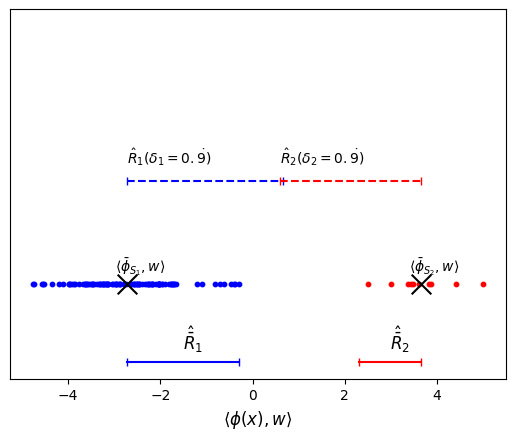

Budget 55 found 45 viable downsampled solutions
Best solution found by removing 17 data points
Downsampled Data:


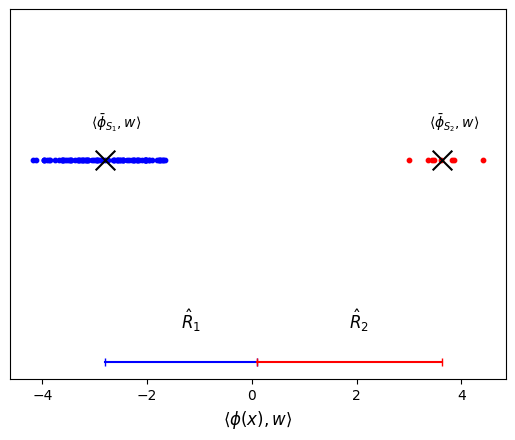

In [86]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
deltas_slacks = downsample.downsample_deltas(
    data_clf['clf']).fit(X, y, _print=True, _plot=True, max_trials=1000, grid_search=True)

## Fit deltas - non sep loss version

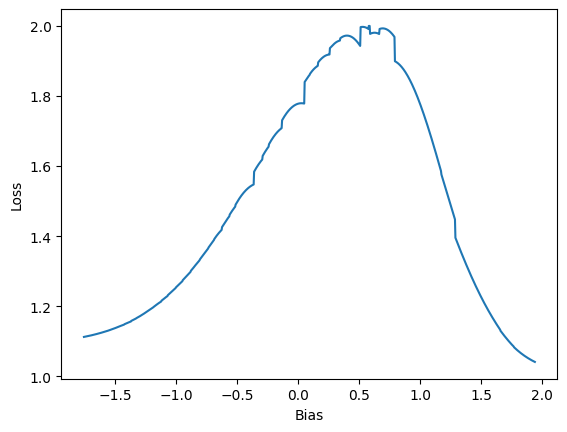

In [87]:

X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
deltas = non_sep.deltas(
    clf).fit(X, y, _plot=True)

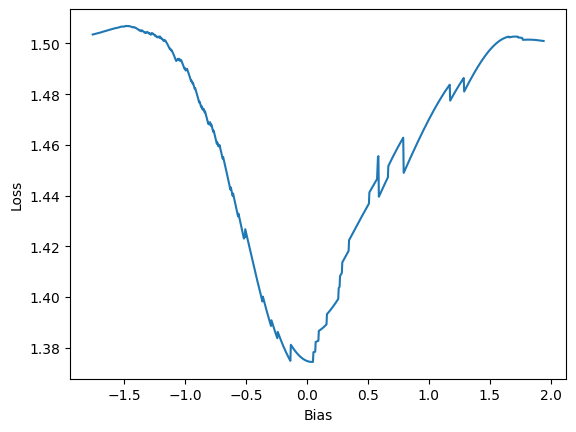

In [88]:
deltas = non_sep.deltas(
    clf).fit(X, y, _plot=True, only_furtherest_k=False, loss_type='mean', res=1000)

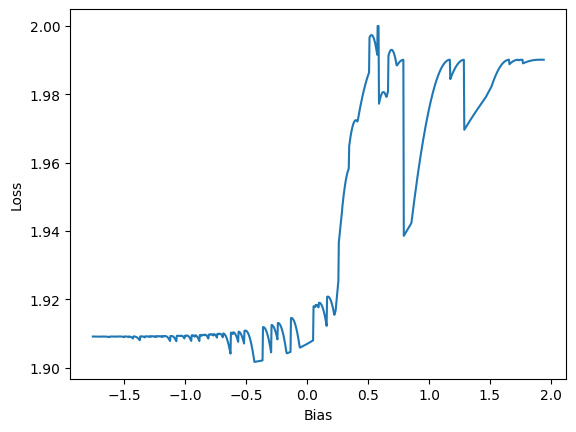

In [89]:
deltas = non_sep.deltas(
    clf).fit(X, y, _plot=True, only_furtherest_k=False, loss_type='max', res=1000)

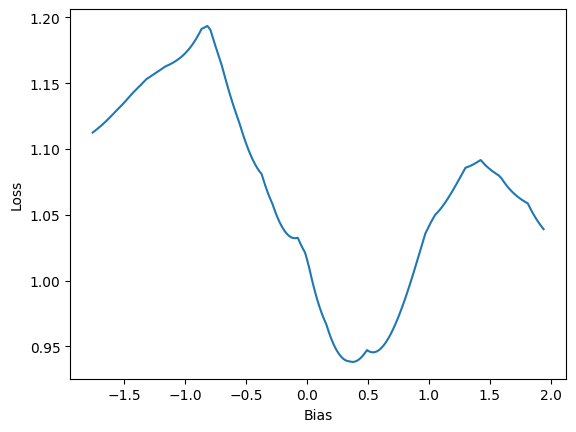

In [90]:
deltas = non_sep.deltas(
    clf).fit(X, y, _plot=True, only_furtherest_k=False, loss_type='min', res=1000)

# Evaluation on test data

               Accuracy    G-Mean        F1
Method                                     
Baseline         0.9575  0.956556  0.955614
Deltas slacks    0.9980  0.998000  0.998000 


Baseline


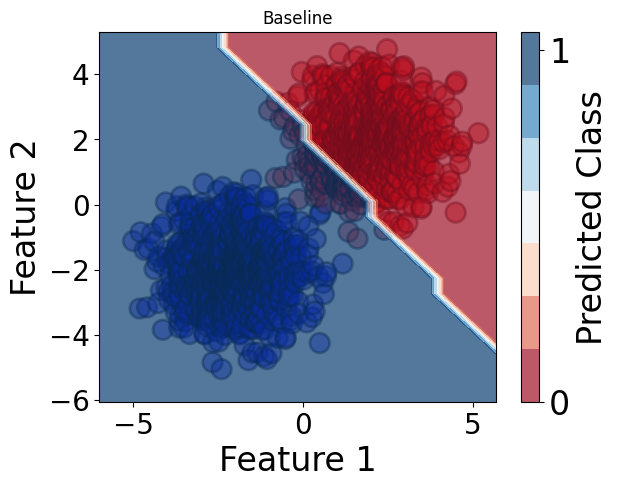

Deltas slacks


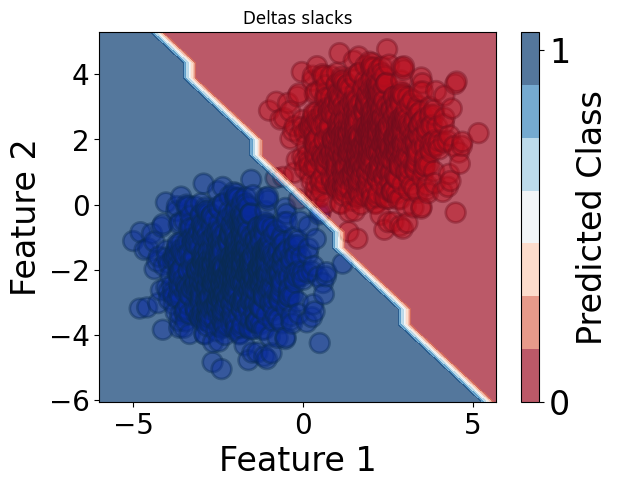

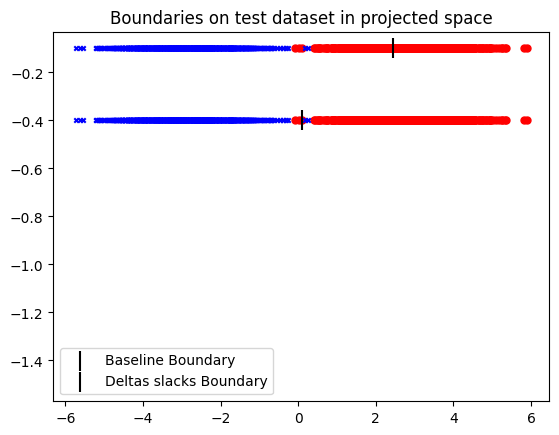

,Accuracy,G-Mean,F1
Method,,,
Baseline,0.9575,0.956556,0.955614
Deltas slacks,0.9980,0.998000,0.998000


In [91]:
classifiers_dict['Deltas slacks'] = deltas_slacks
# classifiers_dict['Deltas'] = deltas
evaluation.eval_test(classifiers_dict,
                       data_clf['data_test'], _print=True, _plot=True)